In [83]:
import numpy as np
import matplotlib.pyplot as plt

## Завдання 1:
### 1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів

In [84]:
k_true = 1.5
b_true = 2

num_points = 100
x = np.random.uniform(-10, 10, num_points)
y_true = k_true * x + b_true
noise = np.random.normal(0, 2, num_points)
y = y_true + noise

### 2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b

In [85]:
def least_squares_fit(x, y):
    # Обчислення середніх значень x і y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Обчислення β1 (k)
    numerator = np.sum((x - x_mean) * (y - y_mean))  # чисельник
    denominator = np.sum((x - x_mean) ** 2)         # знаменник
    k = numerator / denominator
    
    # Обчислення β0 (b)
    b = y_mean - k * x_mean
    
    return k, b


### 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є)

In [86]:
k_lsq, b_lsq = least_squares_fit(x, y)

k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print("Початкові параметри:")
print(f"  k = {k_true}, b = {b_true}")
print("\nОцінка методом найменших квадратів:")
print(f"  k = {k_lsq:}, b = {b_lsq:}")
print("\nОцінка за допомогою np.polyfit:")
print(f"  k = {k_polyfit:}, b = {b_polyfit:}")


Початкові параметри:
  k = 1.5, b = 2

Оцінка методом найменших квадратів:
  k = 1.4746609480401718, b = 1.8734151823863512

Оцінка за допомогою np.polyfit:
  k = 1.4746609480401713, b = 1.8734151823863532


### 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

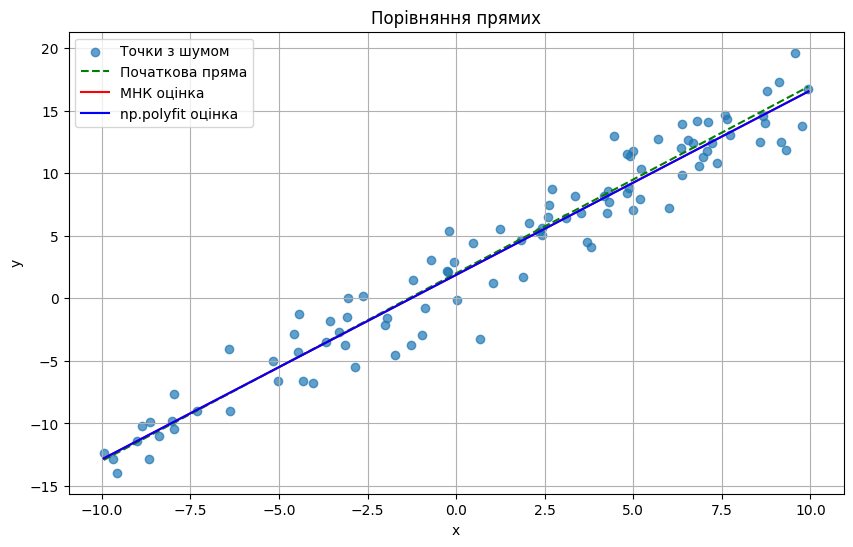

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Точки з шумом", alpha=0.7)
plt.plot(np.sort(x), k_true * np.sort(x) + b_true, color="green", linestyle="--", label="Початкова пряма")
plt.plot(np.sort(x), k_lsq * np.sort(x) + b_lsq, color="red", label="МНК оцінка")
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color="blue", label="np.polyfit оцінка")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння прямих")
plt.legend()
plt.grid(True)
plt.show()


## Завдання 2:
### 1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [88]:
def gradient_descent(x, y, learning_rate, n_iter):
    b = 0  # початкове значення β0
    k = 0  # початкове значення β1
    n = len(y)  # кількість даних
    errors = []  # список для збереження похибок

    for i in range(n_iter):
        # Прогноз значень y на основі поточних параметрів
        y_pred = b + k * x

        # Обчислення функції втрат (MSE)
        error = np.mean(y - y_pred)
        errors.append(error)

        # Обчислення градієнтів
        db = -2 / n * np.sum(y - y_pred)
        dk = -2 / n * np.sum(x * (y - y_pred))

        # Оновлення параметрів
        b_new = b - learning_rate * db
        k_new = k - learning_rate * dk

        # Оновлення параметрів
        b, k = b_new, k_new

    return b, k, errors

In [89]:
learning_rate = 0.01
n_iter = 1000
b_gd, k_gd, errors = gradient_descent(x, y, learning_rate, n_iter)


### 2. Додайте отриману лінію регресії на загальний графік

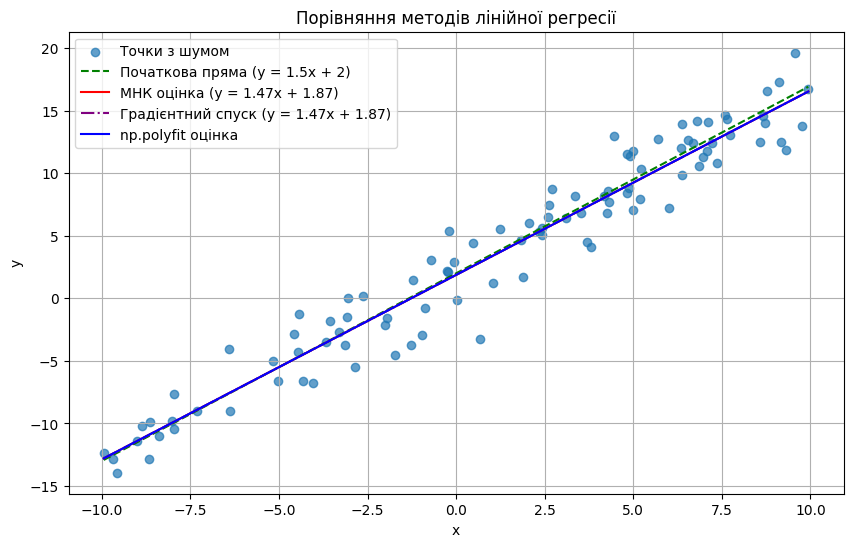

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Точки з шумом", alpha=0.7)
plt.plot(np.sort(x), k_true * np.sort(x) + b_true, color="green", linestyle="--", label="Початкова пряма (y = 1.5x + 2)")
plt.plot(np.sort(x), k_lsq * np.sort(x) + b_lsq, color="red", label=f"МНК оцінка (y = {k_lsq:.2f}x + {b_lsq:.2f})")
plt.plot(np.sort(x), k_gd * np.sort(x) + b_gd, color="purple", linestyle="-.", label=f"Градієнтний спуск (y = {k_gd:.2f}x + {b_gd:.2f})")
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color="blue", label="np.polyfit оцінка")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння методів лінійної регресії")
plt.legend()
plt.grid(True)
plt.show()

### 3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

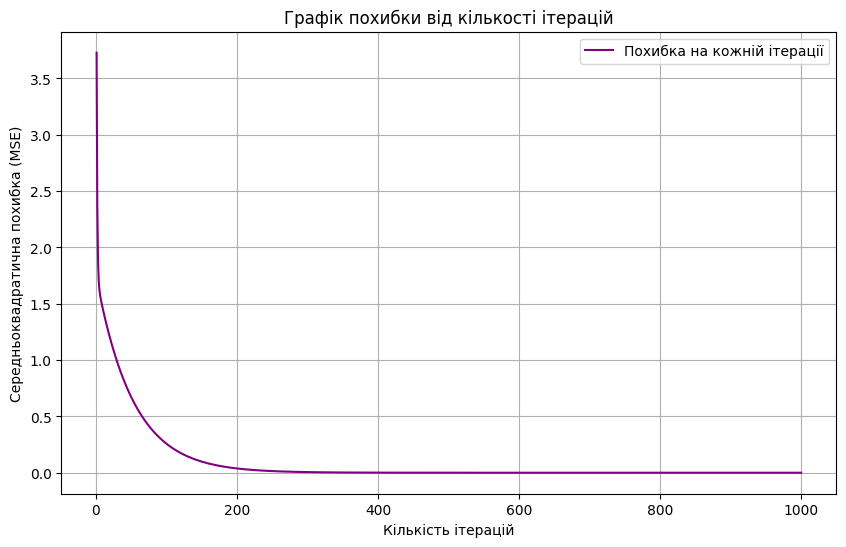

Кількість ітерацій: 1000
Остаточна похибка: 8.126371957573042e-09


In [91]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors)+1), errors, label="Похибка на кожній ітерації", color="purple")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Середньоквадратична похибка (MSE)")
plt.title("Графік похибки від кількості ітерацій")
plt.grid(True)
plt.legend()
plt.show()

print(f"Кількість ітерацій: {len(errors)}")
print(f"Остаточна похибка: {errors[-1]:}")

### 4. Порівняйте отримані результати з результатами попереднього завдання

In [92]:
print("Початкові параметри:")
print(f"  k = {k_true}, b = {b_true}")
print("\nОцінка методом найменших квадратів:")
print(f"  k = {k_lsq:}, b = {b_lsq:}")
print("\nОцінка за допомогою np.polyfit:")
print(f"  k = {k_polyfit:}, b = {b_polyfit:}")
print("\nОцінка за допомогою методу градієнтного спуску:")
print(f"  k = {k_gd:}, b = {b_gd:}")

Початкові параметри:
  k = 1.5, b = 2

Оцінка методом найменших квадратів:
  k = 1.4746609480401718, b = 1.8734151823863512

Оцінка за допомогою np.polyfit:
  k = 1.4746609480401713, b = 1.8734151823863532

Оцінка за допомогою методу градієнтного спуску:
  k = 1.4746609483708566, b = 1.8734151739984892
